# Read and Visualize GLEAM Global Data



## Global Land Evaporation Amsterdam Model (GLEAM)

The GLEAM generates data of hydrological cycle components such as surface and root-zone soil moisture, sensible heat flux, vaporative stress and different components of land evaporation (or 'evapotranspiration'): transpiration, bare-soil evaporation, interception loss, open-water evaporation and sublimation. 

GLEAM combines both reanalysis and satellite data


## Version 4

GLEAM4, the current version, was released in July 2024


## GOSIF Spatial and Temporal Resolution
    - Spatial resolution  : 0.1 degrees  for v4 
    - Spatial extent      : Globe
    - Temporal resolution : Daily and Monthly
    - Temporal extent     : v4.2a - 1980 (January 1st) to 2023 (December 31st)

## Data Download

The data can be downloaded here:

    - https://www.gleam.eu/



------------------------

DTR


# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import xarray as xr

In [4]:
import rioxarray

In [5]:
import cartopy

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [7]:
import scienceplots

In [8]:
import colorcet as cc # alternative source of colorschemes
#https://colorcet.holoviz.org/getting_started/index.html

In [9]:
import os

# Working Directory

In [10]:
#os.getcwd()

## Data  - Monthly

In [11]:
dir_data = "/media/donald/disk10/DATA_GLEAM_MODEL_38/GLEAM_v41_MONTHLY/SMrz/"
dir_data

'/media/donald/disk10/DATA_GLEAM_MODEL_38/GLEAM_v41_MONTHLY/SMrz/'

In [12]:
os.listdir(dir_data)[:7]

['SMrz_2005_GLEAM_v4.1a_MO.nc',
 'SMrz_1982_GLEAM_v4.1a_MO.nc',
 'SMrz_2015_GLEAM_v4.1a_MO.nc',
 'SMrz_1999_GLEAM_v4.1a_MO.nc',
 'SMrz_1988_GLEAM_v4.1a_MO.nc',
 'SMrz_2004_GLEAM_v4.1a_MO.nc',
 'SMrz_1986_GLEAM_v4.1a_MO.nc']

list the files

In [13]:
lst_Files = [fl for fl in os.listdir(dir_data) if fl.endswith('_MO.nc') ]
#lst_Files

In [14]:
len(lst_Files)

44

In [15]:
os.path.join(dir_data, lst_Files[2] )

'/media/donald/disk10/DATA_GLEAM_MODEL_38/GLEAM_v41_MONTHLY/SMrz/SMrz_2015_GLEAM_v4.1a_MO.nc'

# File size and memory checks

In [16]:
def convert_bytes(byt_num):
    """
    this function will convert bytes to KB, MB, GB and TB
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if byt_num < 1024.0:
            return "%3.1f %s" % (byt_num, x)
        byt_num /= 1024.0
    return byt_num
        

In [17]:
def check_filesize(file_path):
    """
    function to check the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [18]:
check_filesize(os.path.join(dir_data, lst_Files[0] ))

'50.7 MB'

# Read the data using Xarray

Often the common choice for reading geotiff files is gdal or rasterio. Here we going to try something different

In [19]:
FILE_NAME = os.path.join(dir_data, lst_Files[0] )
FILE_NAME

'/media/donald/disk10/DATA_GLEAM_MODEL_38/GLEAM_v41_MONTHLY/SMrz/SMrz_2005_GLEAM_v4.1a_MO.nc'

In [20]:
ds_GLEAM = xr.open_dataset(FILE_NAME, decode_coords="all" )

In [21]:
ds_GLEAM

<xarray.Dataset> Size: 311MB
Dimensions:  (time: 12, lon: 3600, lat: 1800)
Coordinates:
  * time     (time) datetime64[ns] 96B 2005-01-31 2005-02-28 ... 2005-12-31
  * lon      (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
Data variables:
    SMrz     (time, lat, lon) float32 311MB ...

## Shape and Dimemsions

In [22]:
ds_GLEAM["SMrz"].shape

(12, 1800, 3600)

## Rename lat and lon

rename lat lon dim names to something rioxarrray expects

In [23]:
ds_GLEAM = ds_GLEAM.rename(lon='longitude', lat= "latitude")

## CRS/Projection

In [24]:
# was the crs/georeference read?
ds_GLEAM.rio.crs

In [25]:
# if file is not projected
ds_GLEAM.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset> Size: 311MB
Dimensions:      (time: 12, longitude: 3600, latitude: 1800)
Coordinates:
  * time         (time) datetime64[ns] 96B 2005-01-31 2005-02-28 ... 2005-12-31
  * longitude    (longitude) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.9
  * latitude     (latitude) float64 14kB 89.95 89.85 89.75 ... -89.85 -89.95
    spatial_ref  int64 8B 0
Data variables:
    SMrz         (time, latitude, longitude) float32 311MB ...

In [26]:
ds_GLEAM.rio.crs

CRS.from_epsg(4326)

## Spatial Resolution

What is the spatial resolution?

In [27]:
ds_GLEAM.rio.resolution()

(0.0999999999999943, -0.09999999999999432)

Unique values

In [28]:
np.unique( ds_GLEAM["SMrz"].values )

array([0.03      , 0.03      , 0.03      , ..., 0.65375257, 0.65378094,
              nan], dtype=float32)

# Plot

## Plot the data - Single Image

In [29]:
ds_GLEAM["SMrz"].time[11].values

numpy.datetime64('2005-12-31T00:00:00.000000000')

In [30]:
#the ocean color to match what is some Journal papers
ocean_color = np.float64([209,230,241])/255 # color that you see in some Journal papers

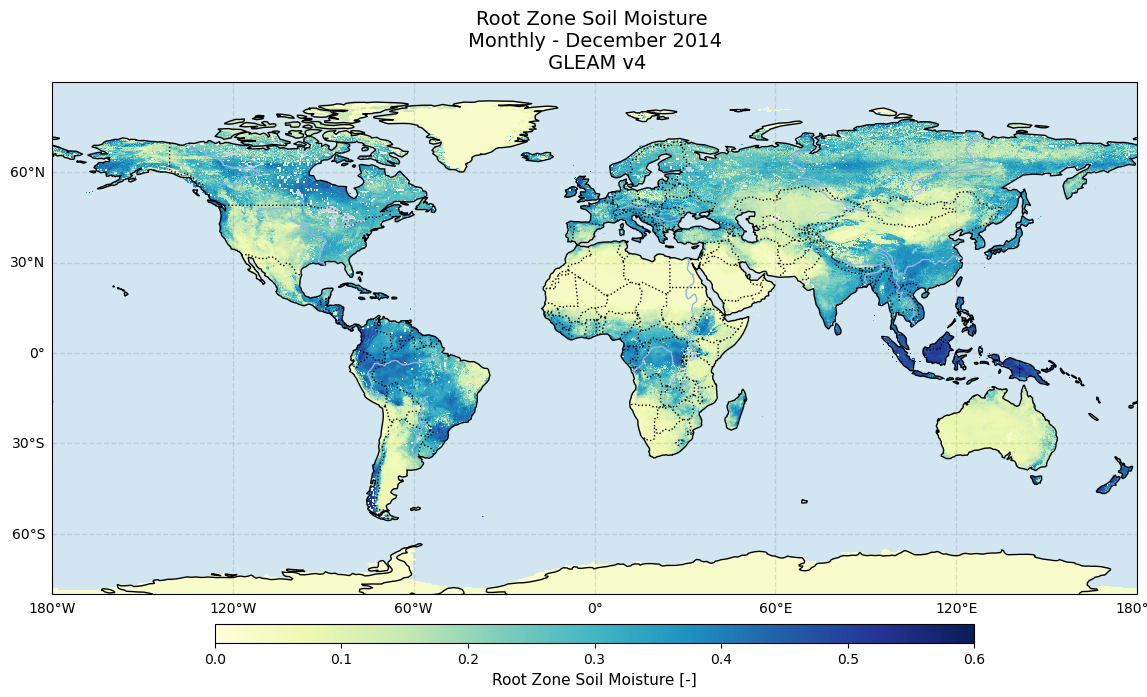

In [31]:
# pad: Fraction of original Axes between colorbar and new image Axes.
cbar_pad = 0.035  # space between colobar and figure

########################################
fig = plt.figure()
fig.set_size_inches(14, 11)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, color=ocean_color, edgecolor='k')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
### add data
#ds_GOSIFv2_INUNITS['SIF'].plot(cmap=plt.cm.RdYlGn_r,vmin=0, vmax=0.8, extend='None',
#                               cbar_kwargs={"label": "SIF \n W $m^{−2}$ $\mu m^{−1}$ $sr^{−1}$",
#                                            'shrink':0.45})

## for more control
im_sif2 = ds_GLEAM["SMrz"].isel(time=11).plot(ax=ax, cmap=plt.cm.YlGnBu, vmin=0, vmax=0.6, 
                                         add_colorbar=False )

## add colorbar inorder to control colobar
cb2 = plt.colorbar(im_sif2, orientation= 'horizontal', pad=cbar_pad, 
                   shrink=0.7, aspect=40) #, extend='both'
# since fig.axes is not being used, aspect is used to manage the width of the colorbar
cb2.set_label(label = "Root Zone Soil Moisture [-]", fontsize=11)
cb2.ax.tick_params(labelsize=10)


#plt.colorbar().set_title('',fontsize=8)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True
###
ax.set_title('Root Zone Soil Moisture \n Monthly - December 2014 \n GLEAM v4',
             fontsize=14,
             y=1.01)

plt.show()

### Different Color Scheme Package

Matplotlib comes with a good set of color schemes and you also come up with your own schemes. However, in terms of pre-packaged schemes, matplotlib is not the only source of color schemes. *colorcet* provides an alternative set of colorschemes. Visit the webpage: https://colorcet.holoviz.org/getting_started/index.html

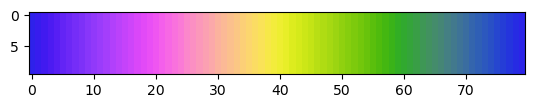

In [32]:
xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
plt.imshow(xs, cmap=cc.cm.colorwheel);  # use tab completion to choose

now plot using a colorcet color scheme

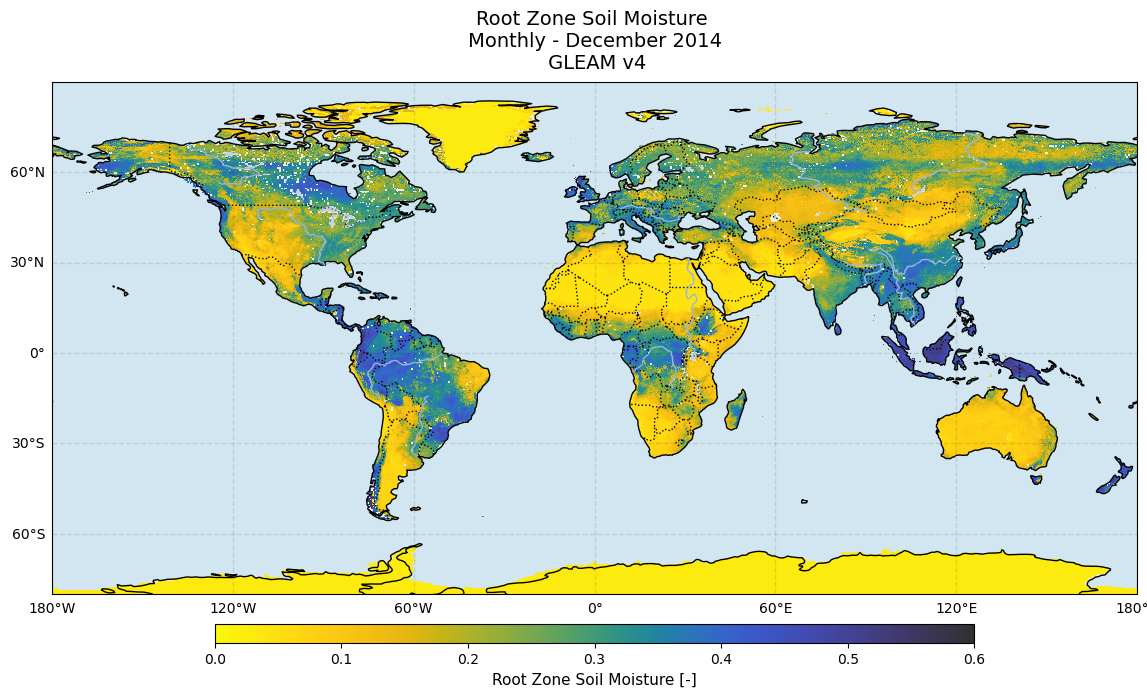

In [33]:
## Parameters to use

use_this_cmap =  cc.cm.gouldian_r        #cc.cm.CET_L5_r    #cc.cm.CET_L16_r  <-- OK  
#https://colorcet.holoviz.org/user_guide/Continuous.html

# pad: Fraction of original Axes between colorbar and new image Axes.
cbar_pad = 0.035  # space between colobar and figure

#############################################
fig = plt.figure()
fig.set_size_inches(14, 11)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, color=ocean_color, edgecolor='k')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
### add data
#ds_GOSIFv2_INUNITS['SIF'].plot(cmap=plt.cm.RdYlGn_r,vmin=0, vmax=0.8, extend='None',
#                               cbar_kwargs={"label": "SIF \n W $m^{−2}$ $\mu m^{−1}$ $sr^{−1}$",
#                                            'shrink':0.45})

## for more control
im_sif2 = ds_GLEAM["SMrz"].isel(time=11).plot(ax=ax, cmap= use_this_cmap,
                                         vmin=0, vmax=0.6, 
                                         add_colorbar=False )

## add colorbar inorder to control colobar
cb2 = plt.colorbar(im_sif2, orientation= 'horizontal', pad=cbar_pad, 
                   shrink=0.7, aspect=40) #, extend='both'
cb2.set_label(label = "Root Zone Soil Moisture [-]", 
              fontsize=11)
cb2.ax.tick_params(labelsize=10)


#plt.colorbar().set_title('',fontsize=8)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, 
                  linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

###
ax.set_title('Root Zone Soil Moisture \n Monthly - December 2014 \n GLEAM v4',
             fontsize =14,
             y=1.01)


plt.show()

# Science-y Plots

If you have a science background or work in research, you can use the python package _sceinceplots_ to produce figures formatted according to IEEE, Nature etc standards

You use the _with_ keyword

In [34]:
# to see some of the availble styles, uncomment the next line and run the code box
#scienceplots.stylesheets

In [35]:
# or look at the examples here:
#https://github.com/garrettj403/SciencePlots/blob/master/examples/plot-examples.py

## IEEE 

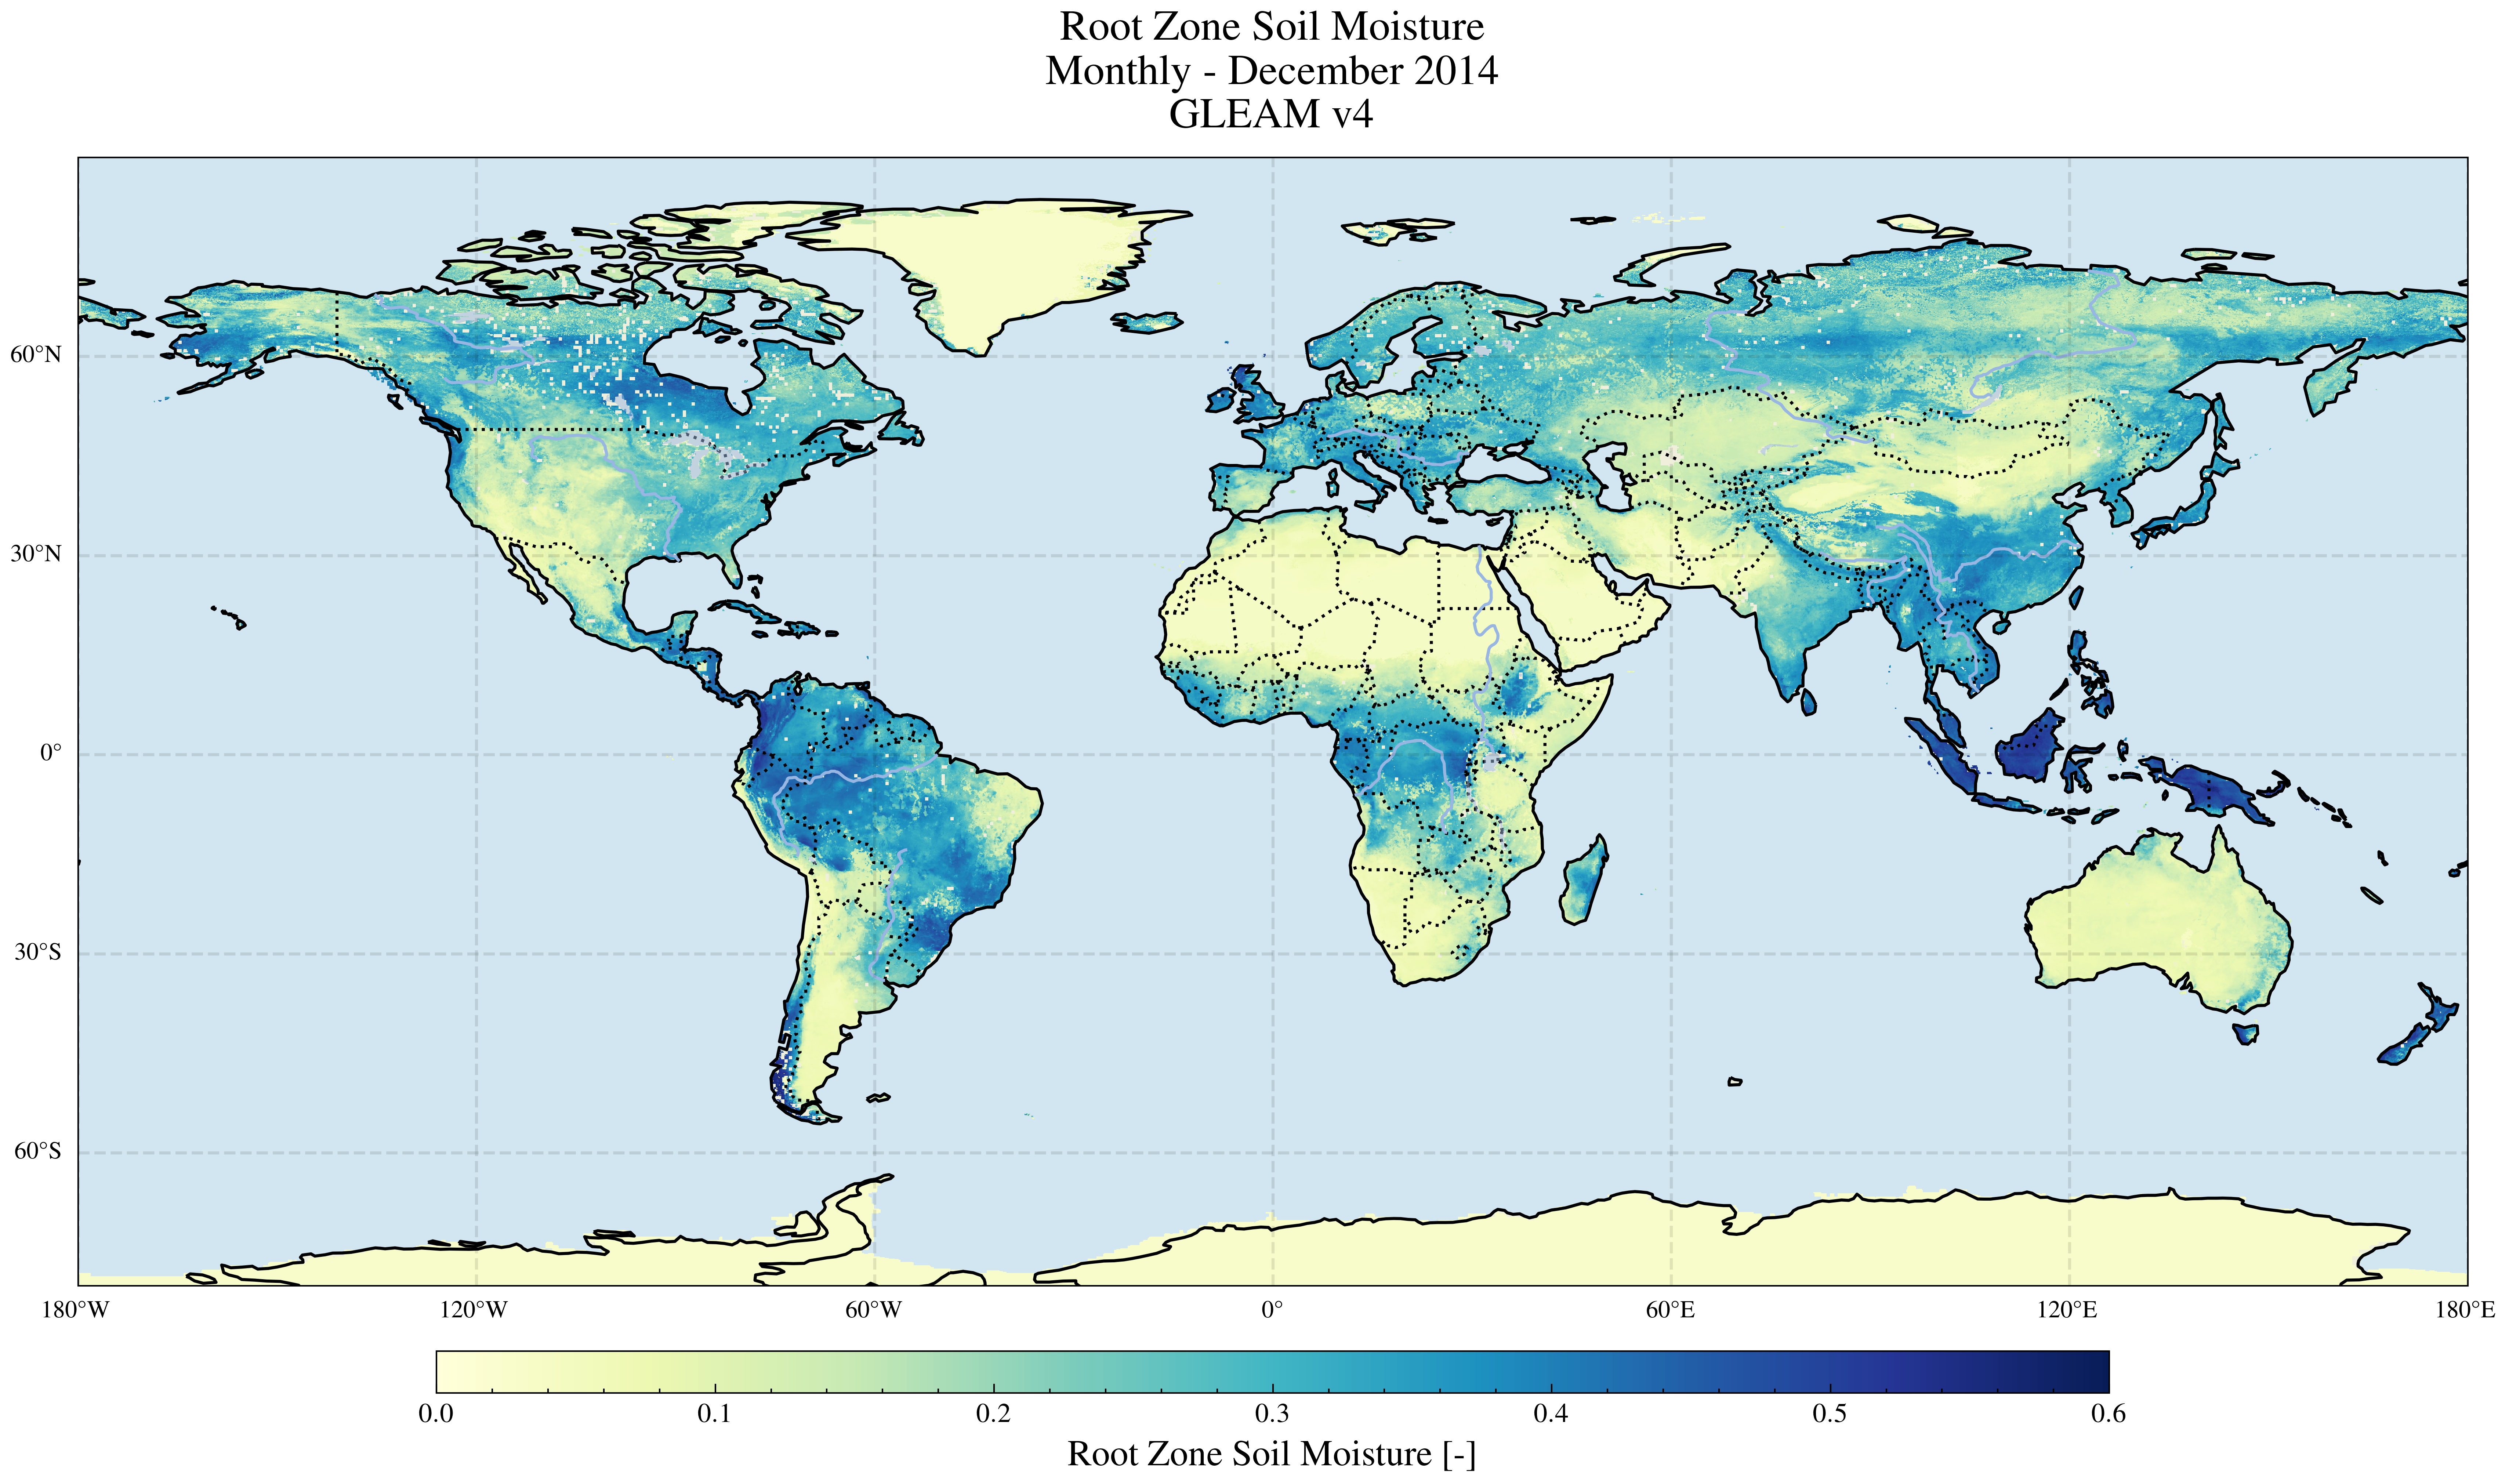

In [36]:
#### To the ieee standard
## Parameters for Fig
use_this_cmap = plt.cm.YlGnBu   #cc.cm.CET_L16_r  #plt.cm.RdYlBu_r
#https://colorcet.holoviz.org/user_guide/Continuous.html

#to ieee standard
with plt.style.context(['science', 'ieee']):
    
    fig = plt.figure()
    fig.set_size_inches(14, 11)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    #set_extent(extents, crs=None)[source]
    #Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
    #If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
    #version of this axes’ projection.
    ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())
    ## add features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN,color=ocean_color, edgecolor='k')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ### add background
    #ax.add_image(stamen_terrain, 8)
    ### add data
    im_ieee = ds_GLEAM["SMrz"].isel(time=11).plot(ax=ax, cmap= use_this_cmap, 
                                                  vmin=0, vmax=0.6,
                                                  add_colorbar=False)

    ## add colorbar inorder to control colobar
    cb = plt.colorbar(im_ieee, orientation= 'horizontal', pad=cbar_pad, 
                      shrink=0.7, aspect=40) #, extend='both'
    cb.set_label(label = "Root Zone Soil Moisture [-]", 
                 fontsize=12)
    cb.ax.tick_params(labelsize=9)
    ##########
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, 
                      linestyle="--")
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True

    ###
    ax.set_title('Root Zone Soil Moisture \n Monthly - December 2014 \n GLEAM v4',
                 fontsize = 14,
                 y=1.01)


    plt.show()

## Nature

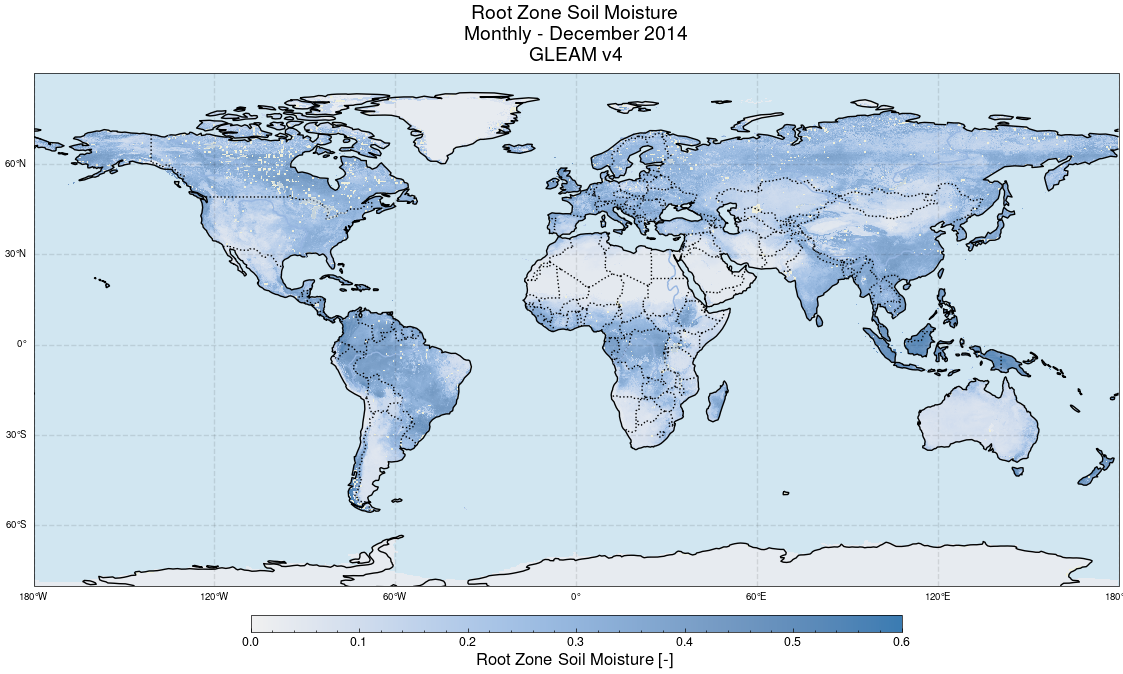

In [37]:
#### to the Nature standard

## Parameters for Fig
use_this_cmap = cc.cm.blues   #gouldian_r  #plt.cm.RdYlBu_r
#https://colorcet.holoviz.org/user_guide/Continuous.htm

#to Nature standard
with plt.style.context(['science', 'nature']):
    
    fig = plt.figure()
    fig.set_size_inches(14, 11)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    #set_extent(extents, crs=None)[source]
    #Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
    #If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
    #version of this axes’ projection.
    ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())
    ## add features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN,color=ocean_color, edgecolor='k')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ### add background
    #ax.add_image(stamen_terrain, 8)
    ### add data
    im_natur = ds_GLEAM["SMrz"].isel(time=11).plot(ax=ax, cmap= use_this_cmap, 
                                                   vmin=0, vmax=0.6,
                                                   add_colorbar=False )
    ## add colorbar inorder to control colobar
    cb = plt.colorbar(im_natur, orientation= 'horizontal', pad=cbar_pad, 
                      shrink=0.6, aspect=40) #, extend='both'
    cb.set_label(label = "Root Zone Soil Moisture [-]", 
                  fontsize=12)
    cb.ax.tick_params(labelsize=9)
    ##########
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, 
                      linestyle="--")
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True
    ###
    ax.set_title('Root Zone Soil Moisture \n Monthly - December 2014 \n GLEAM v4',
                 fontsize = 14,
                 y=1.01)


    plt.show()